## [실습]

### (1) Seaborn 데이터셋 목록

- **anagrams**
- **anscombe**
- **attention**
- **car_crashes**
- **diamonds**
- **dots**
- **dowjones**
- **exercise**
- **fmri**
- **geyser**
- **glue**
- **healthexp**
- **iris**
- **mpg**
- **penguins**
- **planets**
- **seaice**
- **taxis**
- **tips**
- **titanic**

### (2) 양적자료 시각화

- 위 Seaborn 데이터셋에서 양적자료 시각화에 적합한 데이터를 찾아 시각화하세요.
- 코드 파일에는 아래 내용이 포함되어야 합니다.
    - 사용한 데이터셋의 설명
    - 사용하는 데이터(컬럼)의 설명
    - 데이터에 적용한 시각화 기법 설명
    - 적용한 시각화 기법이 데이터에 적합한 이유
    - 시각화 코드

### (3) 질적자료 시각화

- 위 Seaborn 데이터셋에서 질적자료 시각화에 적합한 데이터를 찾아 시각화하세요.
- 코드 파일에는 아래 내용이 포함되어야 합니다.
    - 사용한 데이터셋의 설명
    - 사용하는 데이터(컬럼)의 설명
    - 데이터에 적용한 시각화 기법 설명
    - 적용한 시각화 기법이 데이터에 적합한 이유
    - 시각화 코드

In [117]:
# 타이타닉 nan 지워보기
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

titanic = sns.load_dataset("titanic")

titanic["age"] = titanic["age"].fillna(titanic["age"].mean())

# print(titanic.info())

# print(titanic['deck'].unique())

titanic["deck"] = titanic["deck"].fillna("C")

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


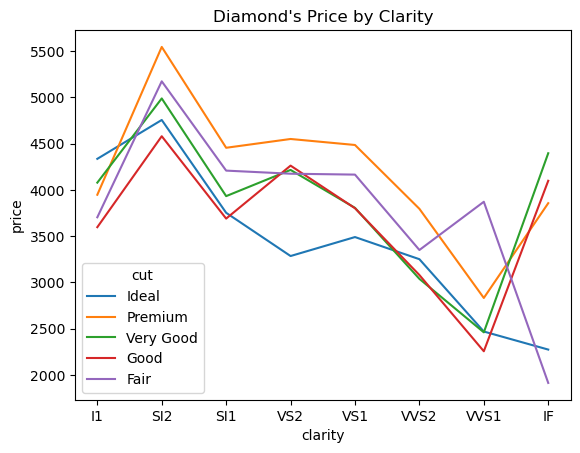

In [61]:
diamonds = sns.load_dataset("diamonds")

print(diamonds.info())

order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

diamonds["clarity"] = pd.Categorical(
    diamonds["clarity"],
    categories=order,
    ordered=True,  # 범주형 데이터에 순서 부여
)

sns.lineplot(
    data=diamonds,
    x="clarity",
    y="price",
    hue="cut",
    color="r",
    errorbar=None,
)

plt.title("Diamond's Price by Clarity")

plt.show()

1. 사용한 데이터셋의 설명
    - 다이아몬드의 가격, 캐럿, 색상, 투명도 등의 정보를 포함한 데이터셋.
2. 사용하는 데이터(컬럼)의 설명
    - 투명도 : 다이아몬드 내의 불순물의 포함 정도
    - 가격 : 다이아몬드의 가치
    - 컷 : 다이아몬드가 아름답게 가공된 정도
3. 데이터에 적용한 시각화 기법 설명
    - seaborn의 lineplot을 사용하여 투명도에 따른 다이아몬드의 가격을 다이아몬드의 컷으로 구분해서 분석하기 위해 그래프를 그려 보았음.
    - 사용한 데이터에서, 투명도의 높낮이의 우선 순위가 거꾸로 설정되어 있었기 때문에 우선순위가 오름차순으로 되도록 재설정해줌으로써 가시성을 높임.
4. 적용한 시각화 기법이 데이터에 적합한 이유
    - 투명도에 비례하는 가치를 한눈에 파악할 수 있기 때문에 선형 그래프가 적절하다고 생각함.
5. 시각화 코드
    - 바로 윗 셀에 기재함.

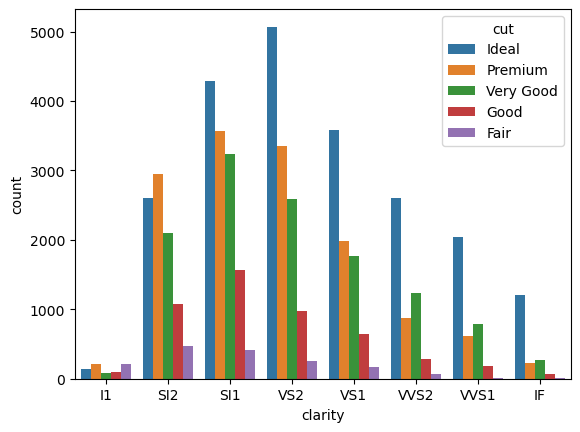

In [59]:
# cut에 따른 투명도당  다이아몬드 개수
selected_diamonds = diamonds.loc[:, ["table", "price", "depth", "carat"]]

corr_diamonds = selected_diamonds.corr()

sns.countplot(
    data=diamonds,
    x="clarity",
    hue="cut",
)
plt.show()

1. 사용한 데이터셋의 설명
    - 다이아몬드의 가격, 캐럿, 색상, 투명도 등의 정보를 포함한 데이터셋.
2. 사용하는 데이터(컬럼)의 설명
    - 투명도 : 다이아몬드 내의 불순물의 포함 정도
    - 가격 : 다이아몬드의 가치
    - 컷 : 다이아몬드가 아름답게 가공된 정도
3. 데이터에 적용한 시각화 기법 설명
    - seaborn의 plot을 사용하여 투명도에 따른 다이아몬드의 가격을 다이아몬드의 컷으로 구분해서 분석하기 위해 그래프를 그려 보았음.
    - 사용한 데이터에서, 투명도의 높낮이의 우선 순위가 거꾸로 설정되어 있었기 때문에 우선순위가 오름차순으로 되도록 재설정해줌으로써 가시성을 높임.
4. 적용한 시각화 기법이 데이터에 적합한 이유
    - 투명도에 비례하는 가치를 한눈에 파악할 수 있기 때문에 선형 그래프가 적절하다고 생각함.
5. 시각화 코드
    - 바로 윗 셀에 기재함.

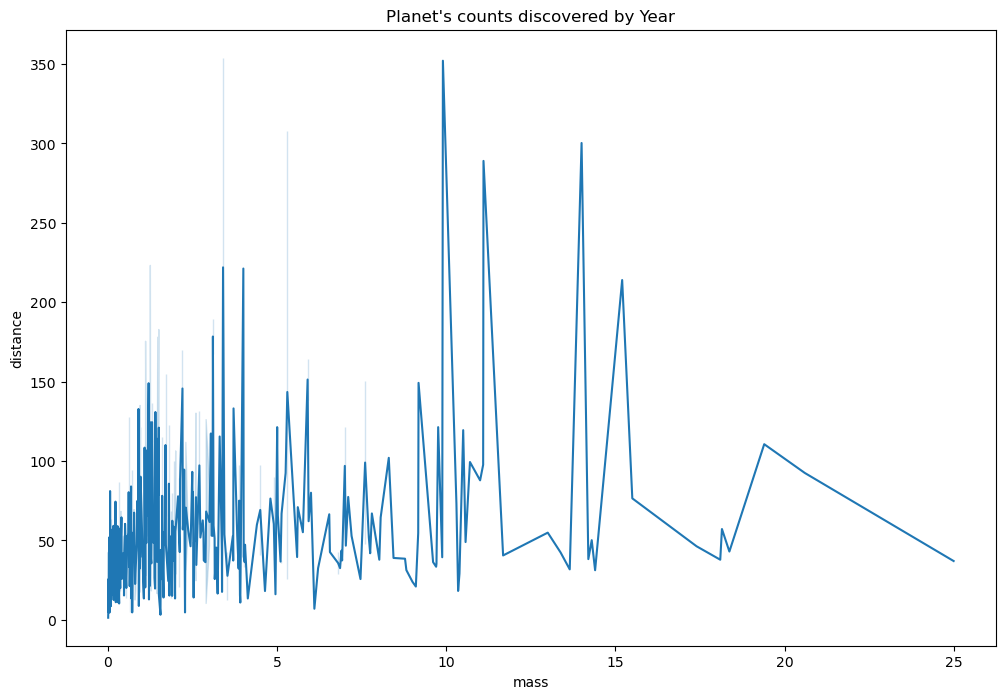

In [82]:
planets = sns.load_dataset("planets")

plt.figure(figsize=(12, 8))
sns.lineplot(data=planets, x="mass", y="distance")

plt.title("Planet's counts discovered by Year")

plt.show()

In [74]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


<Axes: >

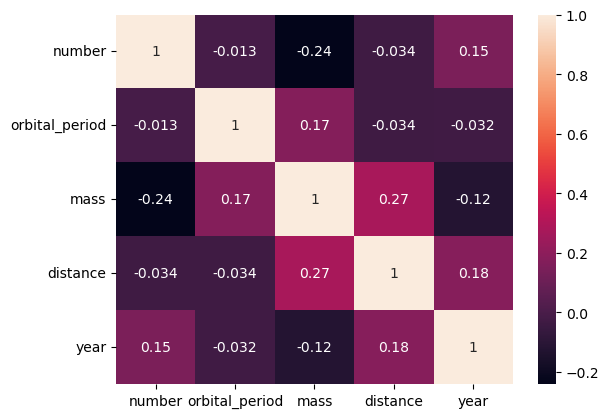

Text(0.5, 1.0, 'Annual Sea Ice Extent')

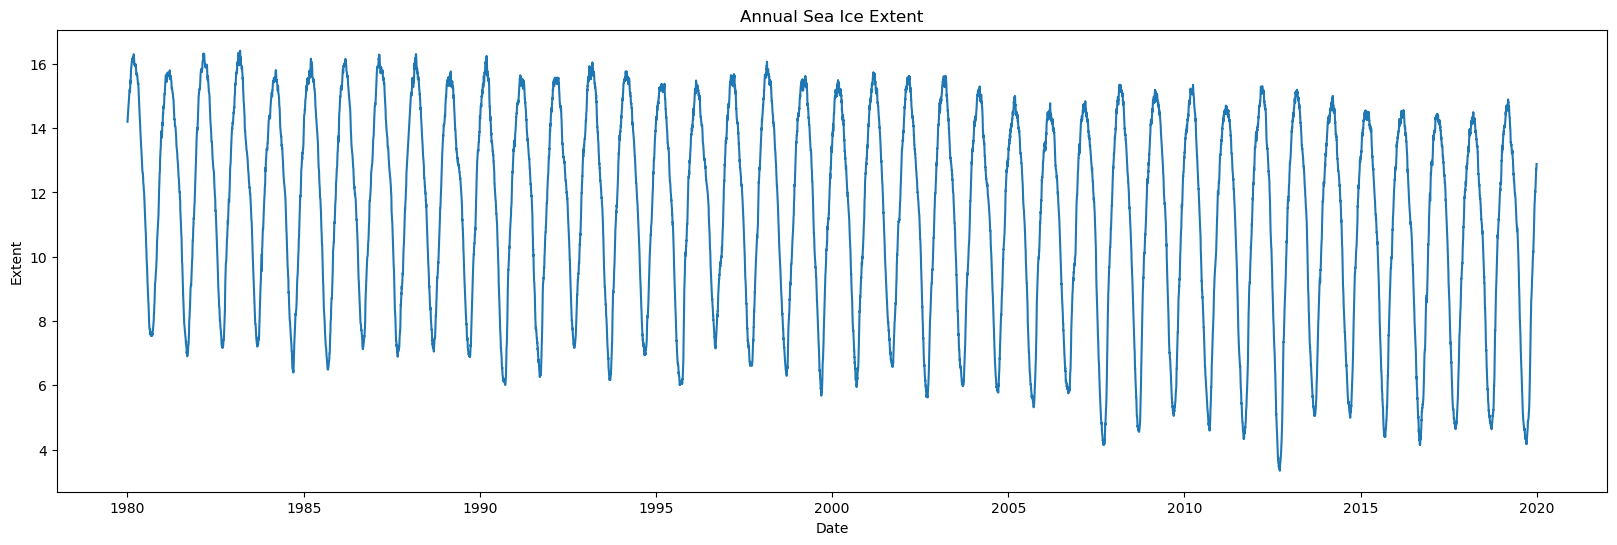

In [91]:
seaice = sns.load_dataset("seaice")

# 연도별 해양 얼음 면적 시각화
plt.figure(figsize=(20, 6))
sns.lineplot(
    data=seaice,
    x="Date",
    y="Extent",
)
plt.title("Annual Sea Ice Extent")

In [86]:
seaice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13175 non-null  datetime64[ns]
 1   Extent  13175 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 206.0 KB


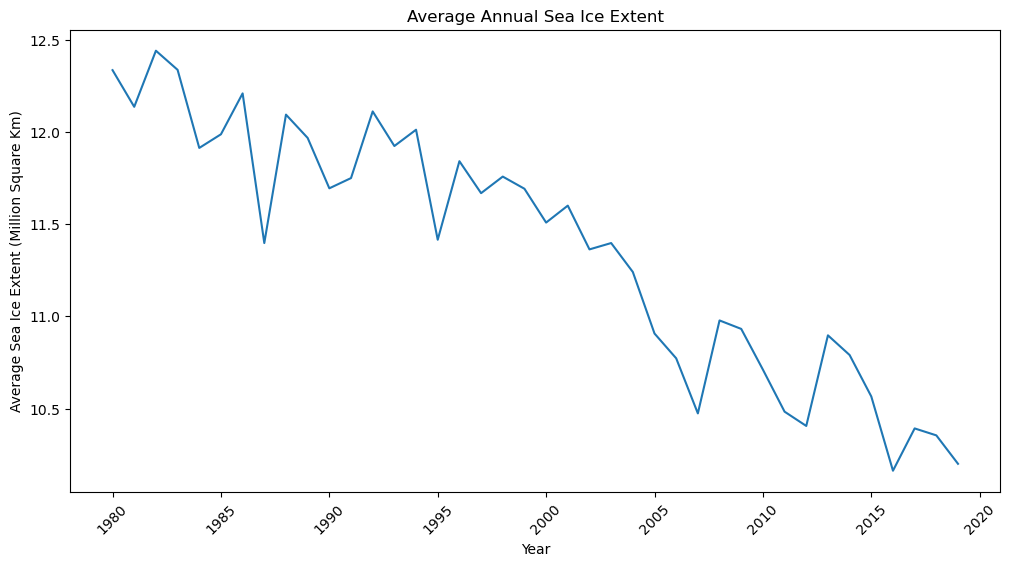

In [94]:
# 연도별 해양 얼음 면적 시각화

# Seaborn의 seaice 데이터셋 로드
seaice = sns.load_dataset('seaice')

# 'Date' 열을 날짜형으로 변환
seaice['Date'] = pd.to_datetime(seaice['Date'])

# 연도로 변환하여 데이터 추가
seaice['year'] = seaice['Date'].dt.year

# 연도별 평균 해양 얼음 면적 계산
annual_extent = seaice.groupby('year')['Extent'].mean().reset_index()

# 연도별 해양 얼음 면적 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_extent, x='year', y='Extent')
plt.title('Average Annual Sea Ice Extent')
plt.xlabel('Year')
plt.ylabel('Average Sea Ice Extent (Million Square Km)')
plt.xticks(rotation=45)
plt.show()

In [101]:
car = sns.load_dataset("car_crashes")

car.info()

car['abbrev']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: abbrev, dtype: object

<Axes: xlabel='abbrev', ylabel='total'>

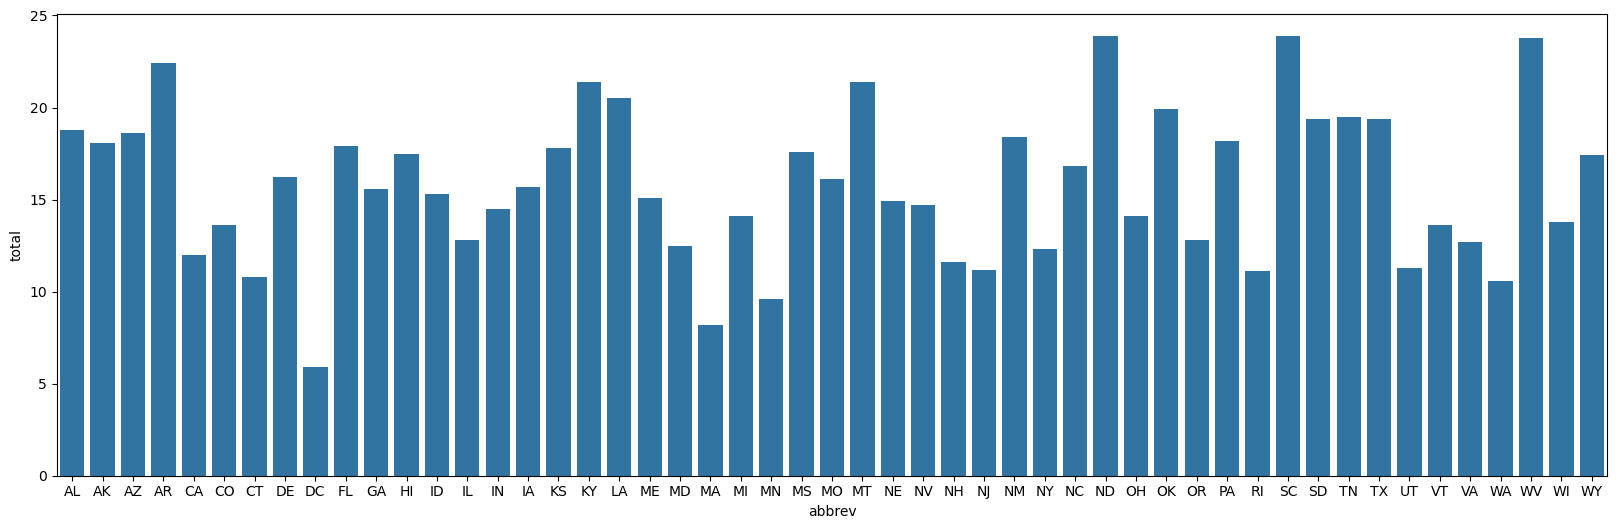

In [108]:

plt.figure(figsize=(20, 6))

sns.barplot(
    data=car,
    x='abbrev',
    y='total'
)